In [28]:
import torch
import torch.nn as nn

def correlation2d(X, K):
  """
  互相关运算
  X 是输入数据
  K 是卷积核
  """
  kh, kw = K.shape
  xh, xw = X.shape
  output = torch.zeros((xh-kh+1, xw-kw+1), dtype=torch.float)
  for r_index in range(xh):
    for c_index in range(xw):
      if r_index+kh > xh or c_index+kw > xw:
        break
      sum = (X[r_index:r_index+kh,
                     c_index:c_index+kw] * K).sum()
      output[r_index, c_index] = sum

  return output


class Conv2d(nn.Module):
  def __init__(self, kernel_size):
    super(Conv2d, self).__init__()
    kernel = torch.rand(kernel_size)
    self.weight = nn.Parameter(kernel)

  def forward(self, x):
    """
    计算 X 和参数 weight 的互相关运算 
    """
    return correlation2d(x, self.weight)

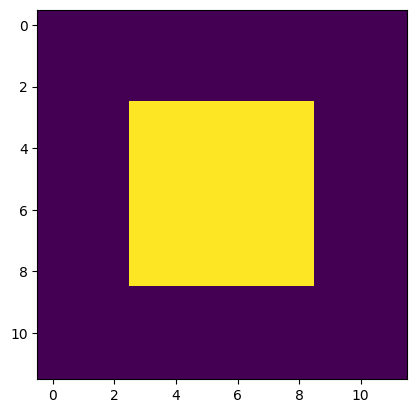

iteration 0, loss 7087836.0
iteration 1000, loss 27234.2421875
iteration 2000, loss 4975.79345703125
iteration 3000, loss 910.1537475585938
iteration 4000, loss 166.4917755126953
iteration 5000, loss 30.461292266845703
iteration 6000, loss 5.57565975189209
iteration 7000, loss 1.0213292837142944
iteration 8000, loss 0.1874038428068161
iteration 9000, loss 0.03484950587153435


In [32]:
import torch
import matplotlib.pyplot as plt

# 设置一个数组img，其中保存的数据代表了图像中的像素。
img = torch.tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 100, 100, 100, 100, 100, 100, 0, 0, 0],
                [0, 0, 0, 100, 100, 100, 100, 100, 100, 0, 0, 0],
                [0, 0, 0, 100, 100, 100, 100, 100, 100, 0, 0, 0],
                [0, 0, 0, 100, 100, 100, 100, 100, 100, 0, 0, 0],
                [0, 0, 0, 100, 100, 100, 100, 100, 100, 0, 0, 0],
                [0, 0, 0, 100, 100, 100, 100, 100, 100, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=torch.float)
plt.imshow(img)  # 将它展示在面板中
plt.show()

# 卷积核kernel，通过该数组可以将图像的边缘显示出来
# 拉普拉斯算子，它可以将相同值的一片数据计算为0
kernel = torch.tensor([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]], dtype=torch.float)

Y = correlation2d(img, kernel)
# plt.imshow(Y)

conv2d = Conv2d(kernel_size=(3, 3))
lr = 1e-7
iteration = 10000

for i in range(iteration):
  Y_hat = conv2d(img)
  conv2d.zero_grad()
  l = ((Y_hat - Y) ** 2).sum()
  l.backward()
  conv2d.weight.data -= lr * conv2d.weight.grad
  if i % 1000 == 0:
    print(f'iteration {i}, loss {l.item()}')

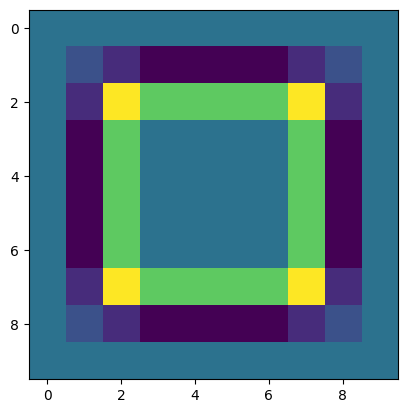

In [34]:
conv2d.eval()
Y_hat = conv2d(img)
plt.imshow(Y_hat.detach().numpy())

In [35]:
conv2d.weight

Parameter containing:
tensor([[-1.0002, -0.9996, -1.0002],
        [-0.9996,  7.9992, -0.9996],
        [-1.0002, -0.9996, -1.0002]], requires_grad=True)